# Fast-Free Time-Resolved Electrostatic Force Microscopy (FF-trEFM)
### Rajiv Giridharagopal, Ph.D. 
#### rgiri@uw.edu
Department of Chemistry  
University of Washington  
Box 351700  
Seattle, Washington, USA 98195  

[Github link](https://github.com/rajgiriUW/ffta)

This notebook walks through the basics of processing data acquired off an AFM into instantaneous frequency. In this specific example, the data are stored line-by-line as .IBW files (from an Asylum Research instrument), with an associated image. In this example, we have a perovskite solar cell and some time-dependent data at each pixel in response to illumination.

In general, getting your data into PyUSID H5 format is up to you. The only critical parameters are that the attributes contain certain key parameters (forthcoming in the documentation).

### 1) Setup

You can see the instructions at the Github repo above to set up FFTA specifically. The setup file should prompt for installation of certain relevant packages, particularly Pycroscopy and PyUSID. These packages, particularly PyUSID, are used the store and manipulate these data in HDF5 format.

Note (9/12/2020) that the Pycroscopy infrastructure is undergoing to major reorganization. To that end, "sidpy" will be required as that contains relevant interface code for pyUSID and the new pyNSID (which both are used to represent data). 

In [2]:
import ffta
import pycroscopy as px
import pyUSID as usid
import numpy as np
from matplotlib import pyplot as plt

c:\users\raj\documents\coding\pyusid\pyusid\pyUSID\viz\__init__.py:18: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  FutureWarning)


### 2) Loading data

Typically you have a multi-layered image (an IBW, say) with the topography+associated channels saved, and for transient analysis a folder of data associated with the image. FFTA also requires a parameters.cfg file, an example of which is in the main FFTA folder (example_parameters.cfg)

It is certainly possible to just process the folder of data and not have an image; this approach is mostly to use an advantage of Pycroscopy wherein all the data associated with a particularly measurement are held together.

First, download the example data off our Google Drive. These are very large, ~8 GB total. 

[Dataset](https://drive.google.com/drive/folders/167FZOSlzgwWG_mo700egZonFDSVNhW63?usp=sharing)

In [ ]:
# input file paths manually here:
base_file_path = r'FOLDER_WHERE_YOU_SAVED_THE_DATASET'
# e.g. C:\Download\Dataset\
# On my system, this is base_file_path = r'G:\My Drive\FFTA_Notebook\notebook_data'
#base_file_path = r'G:\My Drive\FFTA_Notebook\notebook_data'

#ibw_path = base_file_path + r'\perovskite_example.ibw'
#folder_path = base_file_path + r'\perovskite'


#### 2A) Load data

This command will then convert your data into an HDF5 (.h5) file on your local disk. It will be autosaved in the folder with the IBW.

* convert the IBW file into a H5 file with separate folders for each image layer.
* convert each invididual deflection trace into a Pycroscopy-compatible data file. Save in folder FF_Avg within the structure.

In principle, once this process has completed you no longer need the IBW files as the data are within the .H5 file. You should keep a backup on the associated storage of your choosing, but locally that is safe unless you need to reprocess the data.


```

```

Some parameters to note:
> "verbose = False" to avoid the forty million printed lines.  
> "average = True" averages the data based on number of samples per pixel, then stores that data. This process shrinks the H5 considerably, and it speeds up processing time. In a typical oscilloscope, this process is done prior to displaying data.
> "mirror = True" (default). For conventional FF-trEFM, the data are acquired on the retrace, meaning as saved they are backwards from the topography. To make them sensibly line up, this mirror parameter is the default case. 

In [3]:
# If in Spyder or an equivalent IDE, the following brings up a dialogue box for selecting the files
# h5_path, parm_dict, h5_avg = ffta.load.load_hdf.load_wrapper()

# Otherwise, input them manually
base_file_path = r'F:\Raj - trEFM data\150921-PTB7'
ibw_path = base_file_path + r'\FF4_128img.ibw'
folder_path = base_file_path + r'\FF4_CH03dB10V128'
ibw_path = r'F:/Raj - trEFM data/20200914 - MAPI IMskpm ff fk kp/FF10_postPL02_v3.ibw'
folder_path = r'F:\Raj - trEFM data\20200914 - MAPI IMskpm ff fk kp\FF10_-5V_floating_600mA_postPL02'
h5_path, parm_dict, h5_avg = ffta.load.load_hdf.load_wrapper(ibw_file_path=ibw_path, ff_file_path=folder_path)

c:\users\raj\documents\coding\sidpy\sidpy\sid\translator.py:44: FutureWarning: Consider using sidpy.Reader instead of sidpy.Translator if possible and contribute your reader to ScopeReaders
  FutureWarning)
c:\users\raj\documents\coding\pyusid\pyusid\pyUSID\io\hdf_utils\simple.py:1096: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')
c:\users\raj\documents\coding\pyusid\pyusid\pyUSID\io\hdf_utils\simple.py:1153: UserWarning: pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer createsregion references for each dimension. Please use pyUSID.io.reg_ref.write_region_references to manually create region references
  warn('pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer creates'
c:\users\raj\documents\coding\ffta\ffta\ffta\load\load_hdf.py:319: H5pyDeprecationWarning: The 

F:\Raj - trEFM data\20200914 - MAPI IMskpm ff fk kp\FF10_-5V_floating_600mA_postPL02 folder path
Loading first signal
#### FFtrEFM_0000.ibw ####
#### FFtrEFM_0001.ibw ####
#### FFtrEFM_0002.ibw ####
#### FFtrEFM_0003.ibw ####
#### FFtrEFM_0004.ibw ####
#### FFtrEFM_0005.ibw ####
#### FFtrEFM_0006.ibw ####
#### FFtrEFM_0007.ibw ####
#### FFtrEFM_0008.ibw ####
#### FFtrEFM_0009.ibw ####
#### FFtrEFM_0010.ibw ####
#### FFtrEFM_0011.ibw ####
#### FFtrEFM_0012.ibw ####
#### FFtrEFM_0013.ibw ####
#### FFtrEFM_0014.ibw ####
#### FFtrEFM_0015.ibw ####
#### FFtrEFM_0016.ibw ####
#### FFtrEFM_0017.ibw ####
#### FFtrEFM_0018.ibw ####
#### FFtrEFM_0019.ibw ####
#### FFtrEFM_0020.ibw ####
#### FFtrEFM_0021.ibw ####
#### FFtrEFM_0022.ibw ####
#### FFtrEFM_0023.ibw ####
#### FFtrEFM_0024.ibw ####
#### FFtrEFM_0025.ibw ####
#### FFtrEFM_0026.ibw ####
#### FFtrEFM_0027.ibw ####
#### FFtrEFM_0028.ibw ####
#### FFtrEFM_0029.ibw ####
#### FFtrEFM_0030.ibw ####
#### FFtrEFM_0031.ibw ####
#### FFtrEFM_0032.

#### 2B) Using PCA to clean up the data

Here's an example of why Pycroscopy is useful. 

Cells
1. Here we use SVD to visualize the principal components. We can then filter all the noisy components when reconstructing the data. The vast majority of data in FFtrEFM tends to be within the first ~10 components, give or take. 

2. The second block plots some of the outputs. The "abundance maps" show the weighting of the components at each pixel, and the "eigenvectors" can be used to visualize what each component represents. 

3. Finally, we decide to reconstruct the data but remove the components that contribute to noise. In this example, those are components 8 to the end, so we set the "clean_components" as [0,1,2,3,4,5,6,7] (you can also write just [0,7])

In [ ]:
# SVD
h5_svd = ffta.analysis.svd.test_svd(h5_avg, show_plots=False) #these plots don't work well in Jupyter

In [ ]:
# If you run show_plots=True, this block is essentially shown automatically. 
# But, to give you an idea of what's happening, let's take a look

# Plot abundance maps correctly
h5_U = h5_svd['U']
h5_V = h5_svd['V']
h5_S = h5_svd['S']

num_rows = parm_dict['num_rows']
num_cols = parm_dict['num_cols']

abun_maps = np.reshape(h5_U[:,:25], (num_rows, num_cols,-1))
eigen_vecs = h5_V[:16, :]

num_abun_rows = 3
num_abun_cols = 3
fig, a = plt.subplots(nrows=num_abun_rows, ncols=num_abun_cols, figsize=(10,10))
a[0][0].set_title('Abundance Maps')

tt = np.transpose(abun_maps, (2, 0, 1))

# The pycroscopy plot wrapper doesn't work in Jupyter
for r in range(num_abun_rows):
    for c in range(num_abun_cols):
        
        a[r][c].imshow(tt[:][:][r*num_abun_rows+c], cmap='inferno')

h5_spec_vals = h5_avg.get_spec_values('Time')
fig_eigvec, axes = usid.viz.plot_utils.plot_curves(h5_spec_vals*1e3, eigen_vecs, use_rainbow_plots=False, 
                                                 x_label='Time (ms)', y_label='Displacement (a.u.)', 
                                                 num_plots=9, subtitle_prefix='Component', 
                                                 title='SVD Eigenvectors', evenly_spaced=False)

In [ ]:
# Rebuild
clean_components = [0,1,2,3,4] # change based on SVD

h5_rb = ffta.analysis.svd.svd_filter(h5_avg, clean_components)

In [ ]:
# Print out the tree to see what we has
usid.hdf_utils.print_tree(h5_rb.file, rel_paths=True)

tx = 1e3 * np.arange(0,h5_rb.attrs['total_time'], 1/h5_rb.attrs['sampling_rate'])[:]
plt.plot(tx, h5_rb[0,:])
plt.title('Time series data from pixel 0,0')
plt.ylabel('Deflection (V)')
plt.xlabel('Time (ms)')

### 3) Instaneous Frequency Processing using PyUSID

At this point we have:  

    1. an H5 file with the raw and averaged data.  
    2. a processed set of the deflection data from PCA  
   
We then use the PyUSID [Process](https://pycroscopy.github.io/pyUSID/auto_examples/intermediate/plot_process.html) class to help speed up and debug the processing of this dataset. In this case, we have a class FFtrEFM that inherits Process.


In [18]:
# Create our Process class
# Change Override to "True" if you want to redo this process
data = ffta.hdf_utils.process.FFtrEFM(h5_rb, override=False)

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file


c:\users\raj\documents\coding\pyusid\pyusid\pyUSID\io\hdf_utils\base.py:133: UserWarning: pyUSID.io.hdf_utils.get_attributes has been moved to sidpy.hdf.hdf_utils.get_attributes. This copy in pyUSID willbe removed in future release. Please update your import statements
  warn('pyUSID.io.hdf_utils.get_attributes has been moved to '


Let's see what the data look like using our written function test()

[array([ 4.33185847e+04,  4.33185847e+04,  4.33185847e+04, ...,
        -1.96147927e+01, -1.75399113e+01, -1.55389338e+01]),
 array([5.52660351e-08, 5.52660351e-08, 5.52660351e-08, ...,
        5.47002975e-08, 5.46882948e-08, 5.47224794e-08]),
 array([1.58802708, 1.58802708, 1.58802708, ..., 1.58532717, 1.58532602,
        1.58532969]),
 0.0002535,
 -26.144210915380913,
 array([4.24043041e-10, 4.24043041e-10, 4.24043041e-10, ...,
        3.37016466e-10, 3.36946596e-10, 3.37161131e-10])]

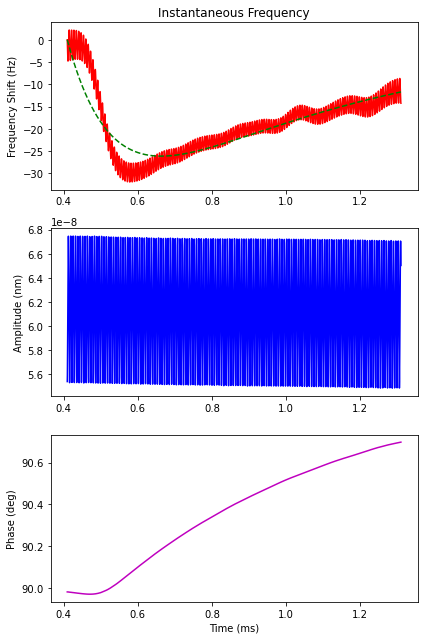

In [19]:
data.test()

That looks...okay. But maybe we can do a little better.
We can update the parameters using the FFtrEFM Class function "update_parm"

In this case, lets filter the amplitude, and we'll set the region-of-interest for plotting the instananeous frequency to be only 300 us after the trigger. Let's also adjust the trigger to be about 20 us ahead.

c:\users\raj\documents\coding\pyusid\pyusid\pyUSID\io\hdf_utils\base.py:133: UserWarning: pyUSID.io.hdf_utils.get_attributes has been moved to sidpy.hdf.hdf_utils.get_attributes. This copy in pyUSID willbe removed in future release. Please update your import statements
  warn('pyUSID.io.hdf_utils.get_attributes has been moved to '


[array([4.33427426e+04, 4.33427426e+04, 4.33427426e+04, ...,
        4.54310987e+00, 6.61799129e+00, 8.61896876e+00]),
 array([5.52660351e-08, 5.52660351e-08, 5.52660351e-08, ...,
        5.47002975e-08, 5.46882948e-08, 5.47224794e-08]),
 array([1.58771482, 1.58771482, 1.58771482, ..., 1.58761196, 1.58761097,
        1.58761481]),
 4.93e-05,
 -5.508368845991429,
 array([4.24090617e-10, 4.24090617e-10, 4.24090617e-10, ...,
        3.37051849e-10, 3.36981972e-10, 3.37196522e-10])]

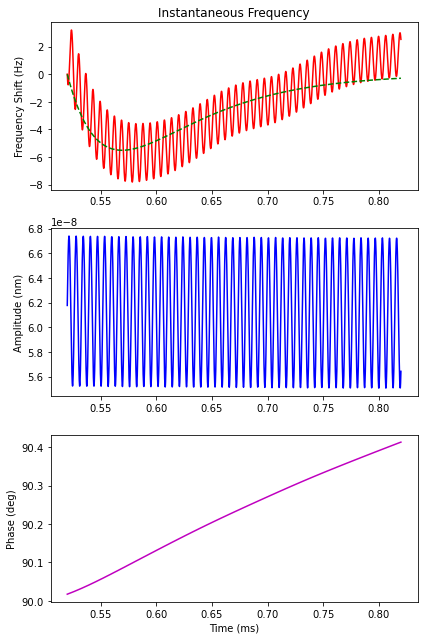

In [20]:
data.update_parm(**{'filter_amp': True, 'roi':0.0003, 'trigger': 0.00052})
data.test()

That's more like it! But what if we want to try, say, STFT (short-time Fourier transform) instead of the Hilbert transform that is the default?

c:\users\raj\documents\coding\pyusid\pyusid\pyUSID\io\hdf_utils\base.py:133: UserWarning: pyUSID.io.hdf_utils.get_attributes has been moved to sidpy.hdf.hdf_utils.get_attributes. This copy in pyUSID willbe removed in future release. Please update your import statements
  warn('pyUSID.io.hdf_utils.get_attributes has been moved to '


[array([ 4.33212226e+04,  4.33212226e+04,  4.33212226e+04, ...,
        -1.69769244e+01, -1.49020430e+01, -1.29010660e+01]),
 array([5.52660351e-08, 5.52660351e-08, 5.52660351e-08, ...,
        5.47002975e-08, 5.46882948e-08, 5.47224794e-08]),
 array([1.58806754, 1.58806754, 1.58806754, ..., 1.58497929, 1.58497811,
        1.58498176]),
 0.0002998,
 -28.68478205502747,
 array([4.24047680e-10, 4.24047680e-10, 4.24047680e-10, ...,
        3.37023331e-10, 3.36953459e-10, 3.37167999e-10])]

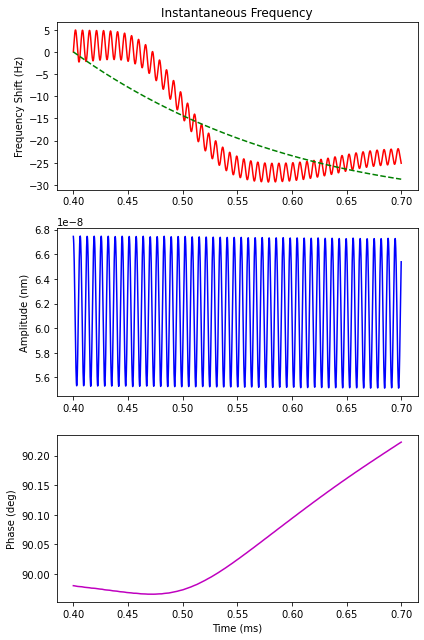

In [21]:
data.update_parm(**{'method':'stft', 'trigger':0.0004})
data.test()

Oh no! That looks much worse. Okay, we'll go back to our Hilbert approach for now. Note that there is also a CWT option (method='wavelet') but it is currently in the debugging stage. 

So we'll reset our data parameters. Finally, we'll use the Process compute() function to parallel compute the results! Compared to serial analysis, it's around 70% faster using the Process class. This next cell will take a few minutes to run, depending on your computer. Hilbert is overwhelmingly the fastest method so far that we have. 

In [22]:
data.update_parm(**{'filter_amp': True, 'roi':0.0003, 'trigger': 0.00052, 'method':'hilbert'})
data.compute()

Creating results datasets


c:\users\raj\documents\coding\pyusid\pyusid\pyUSID\io\hdf_utils\simple.py:263: UserWarning: pyUSID.io.hdf_utils.copy_attributes has been moved to sidpy.hdf.hdf_utils.copy_attributes. This copy in pyUSID willbe removed in future release. Please update your import statements
  'pyUSID.io.hdf_utils.copy_attributes has been moved to '
c:\users\raj\documents\coding\pyusid\pyusid\pyUSID\io\hdf_utils\simple.py:1096: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')
c:\users\raj\documents\coding\pyusid\pyusid\pyUSID\io\hdf_utils\simple.py:1153: UserWarning: pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer createsregion references for each dimension. Please use pyUSID.io.reg_ref.write_region_references to manually create region references
  warn('pyUSID.io.hdf_utils.simple.write_in

Supported dimension_types for plotting are only:  ['UNKNOWN', 'SPATIAL', 'RECIPROCAL', 'SPECTRAL', 'TEMPORAL']
Setting DimensionTypes to UNKNOWN
Supported dimension_types for plotting are only:  ['UNKNOWN', 'SPATIAL', 'RECIPROCAL', 'SPECTRAL', 'TEMPORAL']
Setting DimensionTypes to UNKNOWN
Supported dimension_types for plotting are only:  ['UNKNOWN', 'SPATIAL', 'RECIPROCAL', 'SPECTRAL', 'TEMPORAL']
Setting DimensionTypes to UNKNOWN
	This class (likely) supports interruption and resuming of computations!
	If you are operating in a python console, press Ctrl+C or Cmd+C to abort
	If you are in a Jupyter notebook, click on "Kernel">>"Interrupt"
	If you are operating on a cluster and your job gets killed, re-run the job to resume

Rank 0 finished parallel computation
Rank 0 - 100% complete. Time remaining: 0.0 msec
Finished processing the entire dataset!


<HDF5 group "/FF_Group/FF_Avg-SVD_000/Rebuilt_Data_000/Rebuilt_Data-Fast_Free_000" (11 members)>

The result is a new folder with a bunch of data written. The original data are N x M pixels, with T time points per pixel

    **(N x M, 1)** 
    tfp: the time-to-first-peak data, in time. This is usually the image of interest  
    shift: the frequency shift data, which is mostly equivalent to standard EFM  
    
    **(N x M, T)**
    amplitude: the amplitude of the signal at each time slice
    phase: phase of the signal at each time slice
    inst_freq: the actual instantaneous frequency data at each time slice per pixel. 
    
    **H5 Reference**
    h5_if: the Pycroscopy H5 reference to the processed image file. 
    
We need to do a few more things before we wrap up
1. reshape the tfp/shift to be in matrix shape. The inst_freq can stay the same as it's analyzed in PyUSID, but the tFP/shift are often plotted separately
2. plot the data to make sure it looks okay
3. save the data in CSV format so we can import into other data software (Igor, MATLAB, Excel, etc)


Saving from FFtrEFM Class
/FF_Group/FF_Avg-SVD_000/Rebuilt_Data_000/Rebuilt_Data-Fast_Free_000


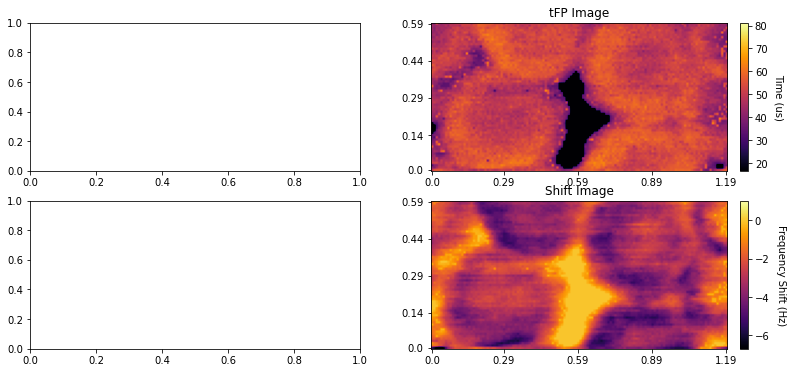

In [23]:
data.reshape()
ffta.hdf_utils.process.plot_tfp(data)
ffta.hdf_utils.process.save_CSV_from_file(data, append='_string_to_identify_data')

#### And that's it! Now close the file. This is important!

In [24]:
# You should make sure to close the file explicitly to preserve the data
h5_rb.file.close()

------------
##### Some useful Pycroscopy/FF-trEFM functionality for accessing specific data

Get an H5 file:
> h5_path = 'file_path_to_h5.h5'

Load some of the relevant datasets. This will give a list of commands you copy-paste to the workspace:
> ffta.hdf_utils.load_hdf.hdf_commands(h5_path)

Print the file structure
> usid.io.hdf_utils.print_tree(h5_file, rel_paths=True)

Name of the H5 File (what is it saved as on disk). Replace "h5_main" with name of a dataset, like h5_if, h5_rb, etc:
> h5_main.file

Get an individual pixel from dataset h5_rb at location 5, 5. Analyze in FF-trEFM. Plot the result:
> pix = ffta.hdf_utils.get_utils.get_pixel(h5_rb, [5, 5])  
> pix.analyze()  
> pix.plot()  

Get the parameters associated with a dataset. This is just an alias to usid.hdf_utils.get_attributes(h5_path)
> params = ffta.hdf_utils.get_utils.get_params(h5_rb)

